In [14]:
#pip install xgboost


## 1. IMPORT LIBRARY YANG DIBUTUHKAN



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve

# Import library untuk menangani data tidak seimbang (imbalanced data)
# Pastikan Anda sudah menginstall imbalanced-learn: pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Import Model Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# Import XGBoost
# Pastikan Anda sudah menginstall xgboost: pip install xgboost
import xgboost as xgb

# Mengatur gaya plot
sns.set_style("whitegrid")
%matplotlib inline



## 2. MEMUAT DAN EKSPLORASI DATA


In [16]:
print("Memuat dataset 'creditcard.csv'...")
try:
    # Memuat set data dari berkas CSV
    raw_data = pd.read_csv('creditcard.csv')
    data = raw_data.copy()
    print("Dataset berhasil dimuat.")
    print("\nInformasi Awal Dataset:")
    data.info()
    print("\n5 baris pertama data:")
    print(data.head())

    # Memeriksa distribusi kelas (penipuan vs. normal)
    print("\nDistribusi Kelas (0: Normal, 1: Penipuan):")
    class_distribution = data['Class'].value_counts()
    print(class_distribution)
    print(f"\nPersentase Penipuan: { (class_distribution[1] / class_distribution.sum()) * 100:.4f}%")
    print("Dataset ini sangat tidak seimbang (highly imbalanced).")

except FileNotFoundError:
    print("\n[ERROR] Berkas 'creditcard.csv' tidak ditemukan.")
    print("Pastikan Anda telah mengunduh dataset dari https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")
    print("dan meletakkannya di direktori yang sama dengan skrip ini.")
    exit() # Keluar dari skrip jika file tidak ada

raw_data.head()

Memuat dataset 'creditcard.csv'...
Dataset berhasil dimuat.

Informasi Awal Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



## 3. PRA-PEMROSESAN DATA (PREPROCESSING)




Memulai pra-pemrosesan data...
Membuat plot korelasi untuk data asli (imbalanced)...


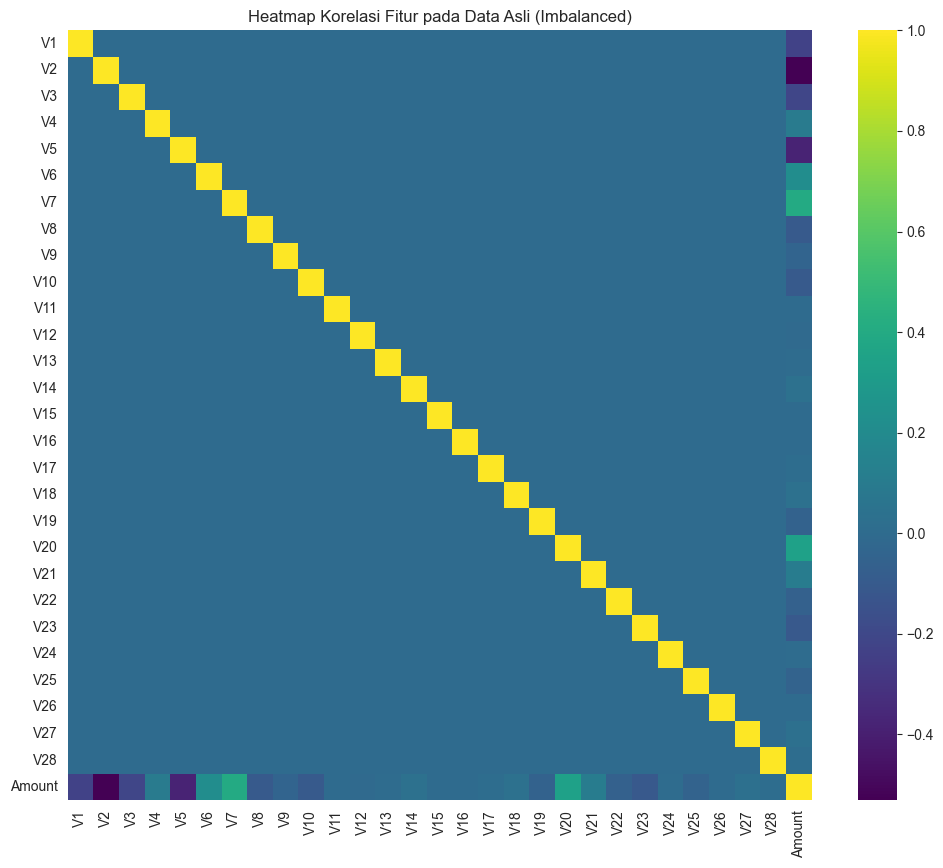


Ukuran data latih asli: (213605, 29)
Ukuran data uji: (71202, 29)

Menerapkan SMOTE pada data latih untuk menyeimbangkan kelas...
Ukuran data latih setelah SMOTE: (426472, 29)

Distribusi Kelas pada Data Latih Setelah Resampling dengan SMOTE:
Class
0    213236
1    213236
Name: count, dtype: int64
Membuat plot korelasi untuk data latih yang sudah diseimbangkan...


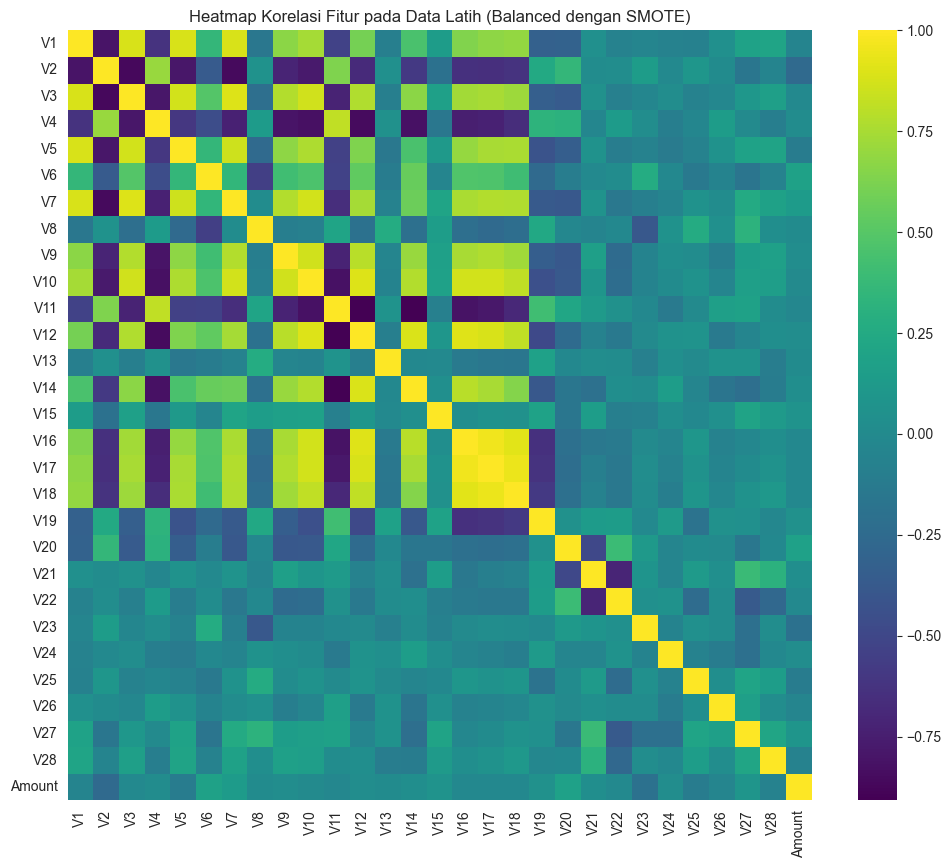

In [17]:
print("\nMemulai pra-pemrosesan data...")

# Fitur 'Time' mungkin tidak terlalu relevan dalam bentuk mentahnya.
# --- NORMALISASI DIHAPUS SESUAI PERMINTAAN ---
# scaler = StandardScaler()
# data['scaled_Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Menghapus kolom 'Time'
# Kolom 'Amount' yang asli kini digunakan
data_processed = data.drop('Time', axis=1)

# Memisahkan fitur (X) dan target (y)
X = data_processed.drop('Class', axis=1)
y = data_processed['Class']

# --- Visualisasi Korelasi pada Data Asli (Imbalanced) ---
print("Membuat plot korelasi untuk data asli (imbalanced)...")
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='viridis', annot=False)
plt.title('Heatmap Korelasi Fitur pada Data Asli (Imbalanced)')
plt.show()

# --- Membagi Data Menjadi Data Latih dan Data Uji ---
# Kita akan membagi data sebelum melakukan oversampling untuk menghindari kebocoran data (data leakage)
# Data uji harus merefleksikan distribusi data di dunia nyata (imbalanced)
X_train_orig, X_test, y_train_orig, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print(f"\nUkuran data latih asli: {X_train_orig.shape}")
print(f"Ukuran data uji: {X_test.shape}")


# --- Menangani Data Tidak Seimbang dengan SMOTE ---
print("\nMenerapkan SMOTE pada data latih untuk menyeimbangkan kelas...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_orig, y_train_orig)

print(f"Ukuran data latih setelah SMOTE: {X_train_resampled.shape}")
print("\nDistribusi Kelas pada Data Latih Setelah Resampling dengan SMOTE:")
print(y_train_resampled.value_counts())

# --- Visualisasi Korelasi pada Data yang Sudah Diseimbangkan ---
print("Membuat plot korelasi untuk data latih yang sudah diseimbangkan...")
# Mengubah X_train_resampled menjadi DataFrame untuk plot korelasi
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
plt.figure(figsize=(12, 10))
sns.heatmap(X_train_resampled_df.corr(), cmap='viridis', annot=False)
plt.title('Heatmap Korelasi Fitur pada Data Latih (Balanced dengan SMOTE)')
plt.show()

## 4. PELATIHAN DAN EVALUASI MODEL


==================== Melatih Model: Logistic Regression ====================

Hasil Evaluasi untuk Logistic Regression:
F1-Score: 0.1441
ROC AUC Score: 0.9687

Laporan Klasifikasi:
              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99     71079
    Penipuan       0.08      0.89      0.14       123

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.57     71202
weighted avg       1.00      0.98      0.99     71202



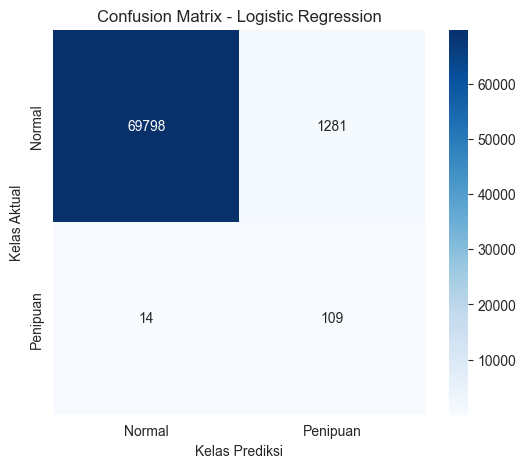


==================== Melatih Model: Decision Tree ====================

Hasil Evaluasi untuk Decision Tree:
F1-Score: 0.5263
ROC AUC Score: 0.8852

Laporan Klasifikasi:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     71079
    Penipuan       0.40      0.77      0.53       123

    accuracy                           1.00     71202
   macro avg       0.70      0.89      0.76     71202
weighted avg       1.00      1.00      1.00     71202



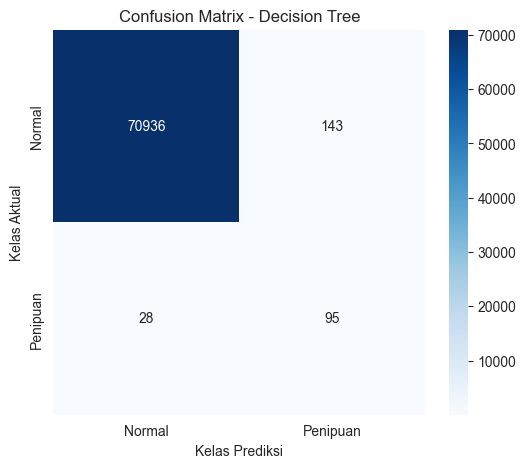


==================== Melatih Model: Random Forest ====================

Hasil Evaluasi untuk Random Forest:
F1-Score: 0.8430
ROC AUC Score: 0.9692

Laporan Klasifikasi:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     71079
    Penipuan       0.86      0.83      0.84       123

    accuracy                           1.00     71202
   macro avg       0.93      0.91      0.92     71202
weighted avg       1.00      1.00      1.00     71202



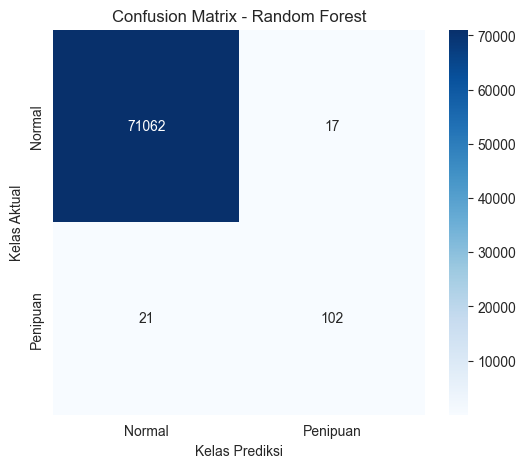


==================== Melatih Model: XGBoost ====================

Hasil Evaluasi untuk XGBoost:
F1-Score: 0.8333
ROC AUC Score: 0.9818

Laporan Klasifikasi:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     71079
    Penipuan       0.81      0.85      0.83       123

    accuracy                           1.00     71202
   macro avg       0.91      0.93      0.92     71202
weighted avg       1.00      1.00      1.00     71202



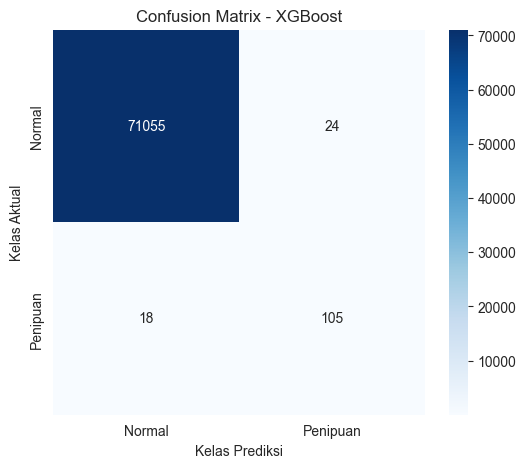


==================== Melatih Model: K-Nearest Neighbors ====================

Hasil Evaluasi untuk K-Nearest Neighbors:
F1-Score: 0.4895
ROC AUC Score: 0.9260

Laporan Klasifikasi:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     71079
    Penipuan       0.34      0.85      0.49       123

    accuracy                           1.00     71202
   macro avg       0.67      0.93      0.74     71202
weighted avg       1.00      1.00      1.00     71202



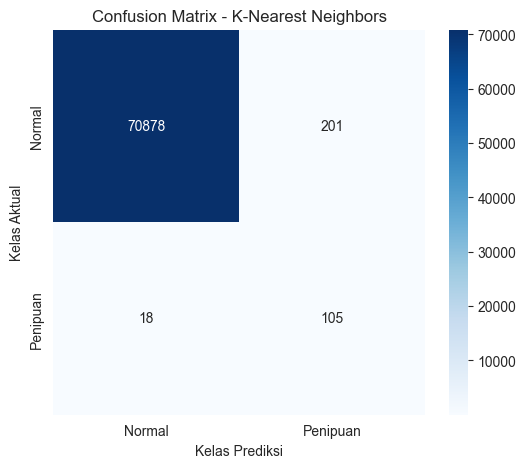


[INFO] Model Support Vector Classifier sangat lambat pada dataset besar.
Melatih SVC hanya pada 10.0% sampel acak dari data latih untuk efisiensi.
Ukuran data latih untuk SVC setelah sampling: (42647, 29)

==================== Melatih Model: Support Vector Classifier ====================

Hasil Evaluasi untuk Support Vector Classifier:
F1-Score: 0.1411
ROC AUC Score: 0.9719

Laporan Klasifikasi:
              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99     71079
    Penipuan       0.08      0.86      0.14       123

    accuracy                           0.98     71202
   macro avg       0.54      0.92      0.57     71202
weighted avg       1.00      0.98      0.99     71202



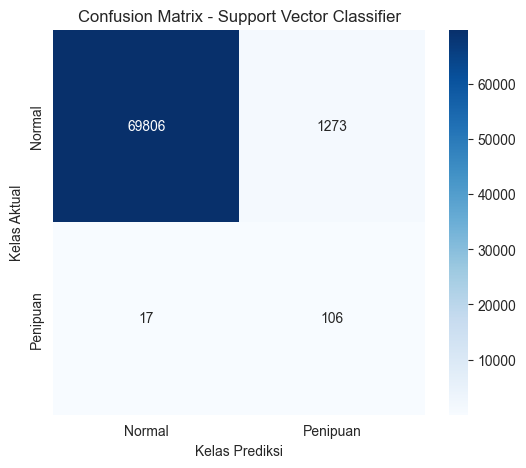

In [18]:
# Dictionary untuk menyimpan hasil setiap model
model_results = {}

def train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    """
    Fungsi untuk melatih model, membuat prediksi, dan mengevaluasi performa.
    """
    print(f"\n{'='*20} Melatih Model: {model_name} {'='*20}")
    
    # Melatih model
    model.fit(X_train, y_train)
    
    # Membuat prediksi pada data uji
    y_pred = model.predict(X_test)
    
    # Menggunakan decision_function atau predict_proba jika tersedia untuk ROC AUC
    if hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_test)
    else:
        y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilitas untuk kelas positif (1)
    
    # Menghitung metrik evaluasi
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Menyimpan hasil
    model_results[model_name] = {
        'F1-Score': f1,
        'ROC_AUC': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    # Menampilkan hasil
    print(f"\nHasil Evaluasi untuk {model_name}:")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Penipuan']))
    
    # Menampilkan Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Normal', 'Penipuan'], 
                yticklabels=['Normal', 'Penipuan'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Kelas Aktual')
    plt.xlabel('Kelas Prediksi')
    plt.show()

# --- Inisialisasi Model ---
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss'), # Menghapus 'use_label_encoder'
    'K-Nearest Neighbors': KNeighborsClassifier(n_jobs=-1),
    'Support Vector Classifier': SVC(probability=True, random_state=42) # SVC sangat lambat, akan ditangani khusus
}

# --- Melatih dan Mengevaluasi Setiap Model ---
# Ukuran sampel untuk SVC untuk mengurangi waktu training
SVC_SAMPLE_FRACTION = 0.1 # Gunakan 10% dari data

for name, model in models.items():
    # PENANGANAN KHUSUS UNTUK SVC KARENA MASALAH PERFORMA
    if name == 'Support Vector Classifier':
        print("\n[INFO] Model Support Vector Classifier sangat lambat pada dataset besar.")
        print(f"Melatih SVC hanya pada {SVC_SAMPLE_FRACTION*100}% sampel acak dari data latih untuk efisiensi.")
        
        # Membuat subsample dari data latih yang sudah diseimbangkan
        X_train_sampled, _, y_train_sampled, _ = train_test_split(
            X_train_resampled, y_train_resampled,
            train_size=SVC_SAMPLE_FRACTION, random_state=42, stratify=y_train_resampled
        )
        print(f"Ukuran data latih untuk SVC setelah sampling: {X_train_sampled.shape}")
        # Melatih SVC pada data yang lebih kecil
        train_and_evaluate_model(model, name, X_train_sampled, y_train_sampled, X_test, y_test)
    else:
        # Melatih model lain pada data latih penuh yang sudah di-resample
        train_and_evaluate_model(model, name, X_train_resampled, y_train_resampled, X_test, y_test)


## 5. PERBANDINGAN MODEL DAN KESIMPULAN



========================= Perbandingan Hasil Model =========================
                           F1-Score   ROC_AUC
Random Forest              0.842975  0.969229
XGBoost                    0.833333  0.981759
Decision Tree              0.526316  0.885173
K-Nearest Neighbors         0.48951  0.926043
Logistic Regression        0.144085  0.968747
Support Vector Classifier  0.141145  0.971857


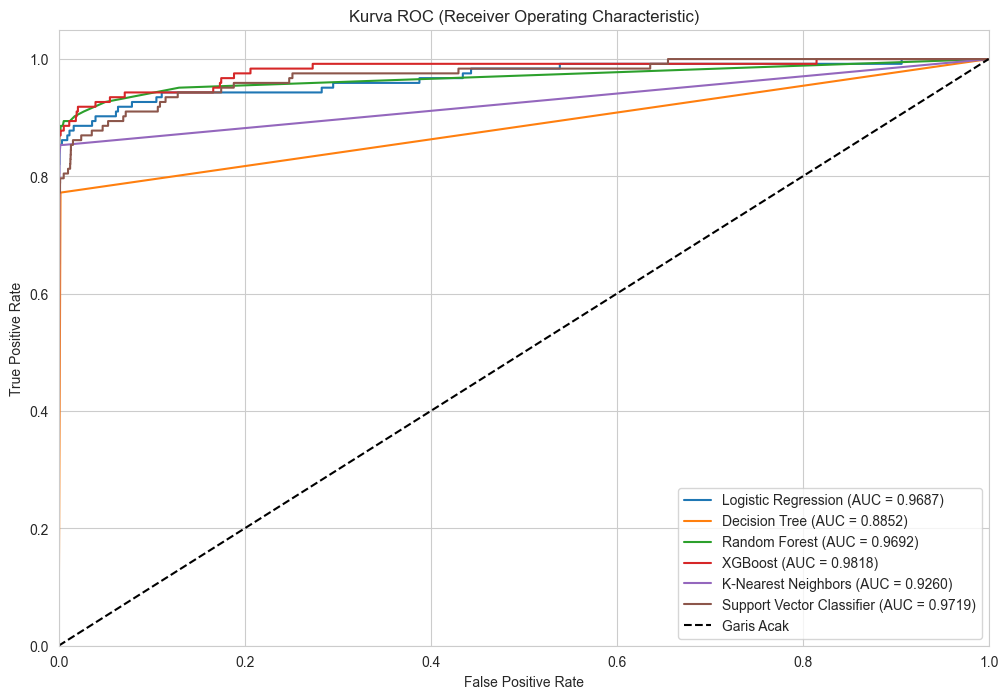


KESIMPULAN:
Berdasarkan F1-Score, model terbaik adalah 'Random Forest' dengan skor 0.8430.
Model ini menunjukkan keseimbangan terbaik antara precision dan recall, yang sangat penting untuk kasus deteksi penipuan di mana melewatkan kasus penipuan (false negative) sangat merugikan.


In [19]:
print(f"\n{'='*25} Perbandingan Hasil Model {'='*25}")

# Membuat DataFrame dari hasil
results_df = pd.DataFrame(model_results).T[['F1-Score', 'ROC_AUC']].sort_values(by='F1-Score', ascending=False)
print(results_df)

# --- Plot Kurva ROC untuk Semua Model ---
plt.figure(figsize=(12, 8))
for name, result in model_results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['ROC_AUC']:.4f})")

# Plot garis acak (no-skill)
plt.plot([0, 1], [0, 1], 'k--', label='Garis Acak')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC (Receiver Operating Characteristic)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --- Kesimpulan ---
best_model_name = results_df.index[0]
best_f1_score = results_df.iloc[0]['F1-Score']
print(f"\nKESIMPULAN:")
print(f"Berdasarkan F1-Score, model terbaik adalah '{best_model_name}' dengan skor {best_f1_score:.4f}.")
print("Model ini menunjukkan keseimbangan terbaik antara precision dan recall, yang sangat penting untuk kasus deteksi penipuan di mana melewatkan kasus penipuan (false negative) sangat merugikan.")